In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import matplotlib as mlp

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, KFold

from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

from sklearn.preprocessing import StandardScaler, PowerTransformer, MinMaxScaler, PolynomialFeatures

from sklearn.linear_model import LinearRegression, Ridge, Lasso

from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

from sklearn.neighbors import KNeighborsRegressor

from sklearn.svm import SVR


from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

import plotly.express as px

sys.path.append('utils')
from modelCrafter import ModelCrafter
from funcs import separa_pontos_manual

pd.set_option('display.max_columns', None)

mlp.rcParams['figure.figsize'] = [10,5]

# **Carregando o dataset**

In [2]:
lines = pd.read_csv('../datasets/projeto_final/data.csv')

In [3]:
lines.head()

,wavenumber,intensity,j,branch,pressure,temperature,fwhm,gamma,sigma,mean_wv,std_wv,skew_wv,kurtosis_wv,max_wv,min_wv,median_wv,mean_int,std_int,skew_int,kurtosis_int,max_int,min_int,median_int
0,5683.56703,0.87873,0,R37,145,293,0.068169,0.033105,0.004739,5683.566085,0.029765,0.000005,-1.199996,5683.61693,5683.51524,5683.56608,0.567632,0.204984,0.105487,-1.423795,0.87873,0.26557,0.549450
1,5701.98259,1.23987,1,R37,145,293,0.077525,0.037694,0.005280,5701.981648,0.034114,-0.000005,-1.199997,5702.04003,5701.92327,5701.98165,0.805899,0.290988,0.084993,-1.431570,1.23987,0.37273,0.784530
2,5719.16744,1.36729,2,R37,145,293,0.080923,0.039601,0.004839,5719.166023,0.035473,0.000010,-1.200007,5719.22676,5719.10529,5719.16602,0.893575,0.319793,0.065195,-1.431605,1.36729,0.41227,0.874895
3,5735.10744,1.37998,3,R37,145,293,0.079175,0.038495,0.005394,5735.106026,0.034386,0.000023,-1.199989,5735.16488,5735.04717,5735.10603,0.903325,0.320822,0.067481,-1.428374,1.37998,0.41933,0.883840
4,5749.79130,1.32506,4,R37,145,293,0.069696,0.034073,0.004263,5749.790830,0.030580,0.000007,-1.199999,5749.84309,5749.73857,5749.79083,0.863854,0.309285,0.075582,-1.441434,1.32506,0.40452,0.846285


# **Verificando integridade dos dados**

In [4]:
lines.isna().sum()

wavenumber      0
intensity       0
j               0
branch          0
pressure        0
temperature     0
fwhm            0
gamma           0
sigma           0
mean_wv         0
std_wv          0
skew_wv         0
kurtosis_wv     0
max_wv          0
min_wv          0
median_wv       0
mean_int        0
std_int         0
skew_int        0
kurtosis_int    0
max_int         0
min_int         0
median_int      0
dtype: int64

In [5]:
lines.duplicated().sum()

0

# Continuação

In [6]:
model_pipeline = Pipeline([('preprocessor',StandardScaler())])

In [7]:
modelos = [('regressao linear',LinearRegression()),
           ('ada',AdaBoostRegressor()),
           ('gbr',GradientBoostingRegressor()),
           ('xgb',XGBRegressor()),
           ('lgbm',LGBMRegressor()),
           ('svm',SVR(kernel='poly')),
           ('ridge',Ridge()),
           ('lasso',Lasso()),
           ('knn',KNeighborsRegressor()),
           ('floresta',RandomForestRegressor(random_state = 0))]

modelcrafter = ModelCrafter()

modelcrafter.AddModel(modelos)

In [8]:
X = lines.drop(['wavenumber','intensity','j','branch','pressure','temperature','gamma','sigma','fwhm'],axis=1)

y = lines['fwhm']

In [9]:
X_train , X_test, y_train, y_test = train_test_split(X,y,test_size=0.2 , shuffle= True,random_state = 0)

X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [10]:
baseline = modelcrafter.ValidacaoCruzada(X_train,y_train,model_pipeline)

baseline.sort_values(by='mape',ascending=True)

-----regressao linear-----
-----ada-----
-----gbr-----
-----xgb-----
-----lgbm-----
-----svm-----
-----ridge-----
-----lasso-----
-----knn-----
-----floresta-----


,mae,mape,rms
regressao linear,0.006709,0.092643,0.017711
floresta,0.008181,0.096147,0.023041
ridge,0.006788,0.096334,0.018332
gbr,0.008235,0.099277,0.022260
xgb,0.008880,0.109591,0.023126
lgbm,0.012128,0.130772,0.027204
knn,0.018785,0.244488,0.026533
ada,0.019858,0.274511,0.028483
lasso,0.051288,0.654170,0.073769
svm,0.055189,0.853388,0.068963


In [11]:
model_pipeline = Pipeline([('power',PowerTransformer()),('norm',StandardScaler())])
model_pipeline

Pipeline(steps=[('power', PowerTransformer()), ('norm', StandardScaler())])

In [12]:
res = modelcrafter.ValidacaoCruzada(X_train,y_train,model_pipeline)

res.sort_values(by='mape',ascending=True)

-----regressao linear-----
-----ada-----
-----gbr-----
-----xgb-----
-----lgbm-----
-----svm-----
-----ridge-----
-----lasso-----
-----knn-----
-----floresta-----


,mae,mape,rms
floresta,0.008218,0.096629,0.023028
gbr,0.008419,0.100480,0.022883
xgb,0.009221,0.112183,0.024020
lgbm,0.011823,0.130744,0.025592
regressao linear,0.013537,0.168398,0.022654
knn,0.020078,0.229507,0.033430
ridge,0.021580,0.255828,0.034647
ada,0.020406,0.276718,0.029860
lasso,0.051288,0.654170,0.073769
svm,0.059708,0.853559,0.067751


In [13]:
modelcrafter.Validacao(X_train,X_test,y_train,y_test,pipe=model_pipeline).sort_values(by='mape_teste')

-----regressao linear-----
-----ada-----
-----gbr-----
-----xgb-----
-----lgbm-----
-----svm-----
-----ridge-----
-----lasso-----
-----knn-----
-----floresta-----


,modelo,mae_treino,mae_teste,rms_treino,rms_teste,mape_treino,mape_teste
9,floresta,0.003244,0.011170,0.009923,0.035678,0.037773,0.093665
2,gbr,0.002083,0.011353,0.003575,0.035705,0.025814,0.100870
3,xgb,0.000583,0.012587,0.000800,0.033978,0.007785,0.120407
4,lgbm,0.005570,0.014333,0.014622,0.034654,0.057428,0.128539
0,regressao linear,0.012884,0.018332,0.021730,0.031361,0.158244,0.198885
6,ridge,0.020633,0.020562,0.033117,0.035248,0.244208,0.221100
8,knn,0.015461,0.020629,0.026740,0.037705,0.175207,0.233688
1,ada,0.018829,0.026501,0.022710,0.041241,0.260001,0.337080
7,lasso,0.051059,0.052032,0.074055,0.072684,0.651407,0.715834
5,svm,0.057425,0.057089,0.064982,0.066756,0.806699,0.848105


In [14]:
model = Pipeline([('power',PowerTransformer()),
                  ('norm',StandardScaler()), 
                  ('model',RandomForestRegressor(random_state = 0))
                ])

model.fit(X_train,y_train)

Pipeline(steps=[('power', PowerTransformer()), ('norm', StandardScaler()),
                ('model', RandomForestRegressor(random_state=0))])

In [15]:
pred = model.predict(X_test)

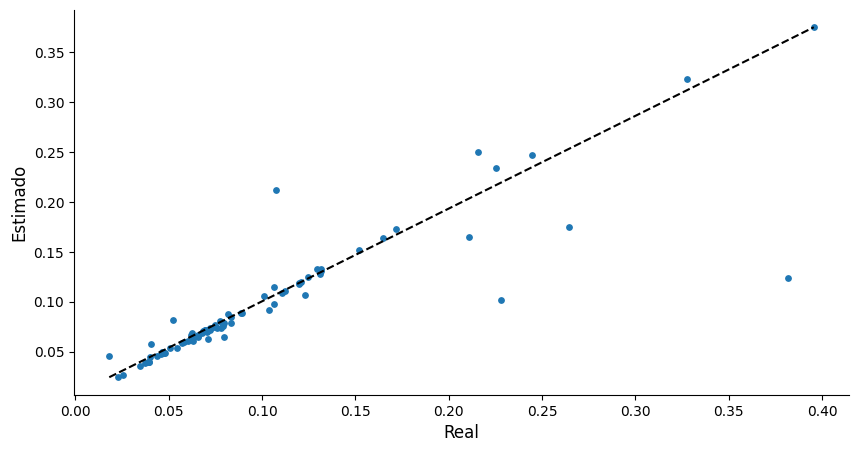

In [18]:
fig,ax = plt.subplots()

ax.plot([y_test.min(),y_test.max()],[pred.min(),pred.max()],'--',color='black',linewidth=1.5)
ax.scatter(x = y_test ,y = pred,s = 15)
ax.set_ylabel('Estimado',size=12)
ax.set_xlabel('Real',size=12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

In [22]:
resultados = pd.DataFrame({'real': y_test, 'estimado':pred})

In [33]:
resultados['erro'] = np.abs(resultados['real'] - resultados['estimado']) / resultados['real']
resultados['residuos'] = resultados['real'] - resultados['estimado']

In [34]:
resultados.describe().T

,count,mean,std,min,25%,50%,75%,max
real,85.0,0.098083,0.072835,0.018190,0.058265,0.072363,0.112233,0.395483
estimado,85.0,0.094243,0.061646,0.024254,0.060544,0.073210,0.110979,0.375216
erro,85.0,0.093662,0.221967,0.000026,0.009172,0.026263,0.061269,1.516125
residuos,85.0,0.003840,0.035681,-0.104980,-0.002055,-0.000441,0.001254,0.257502


<AxesSubplot: xlabel='real', ylabel='residuos'>

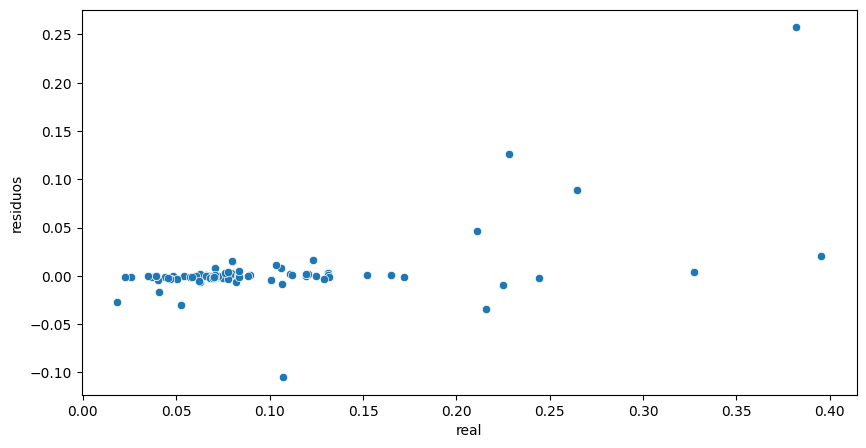

In [40]:
sns.scatterplot(data=resultados,x='real',y='residuos')

<AxesSubplot: xlabel='real', ylabel='erro'>

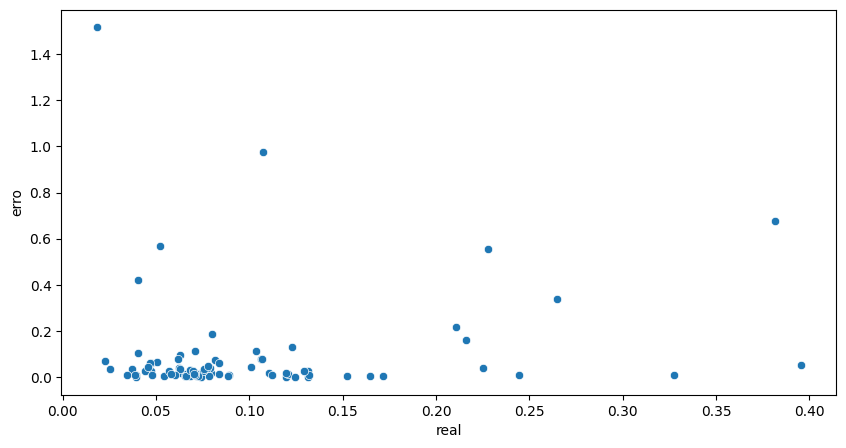

In [41]:
sns.scatterplot(data=resultados,x='real',y='erro')

In [59]:
resultados['erro'].quantile(0.5)*100

2.626258414408526